<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/lab_mnist_curse_dimensionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hands‑On Lab (curse of dimensionality)

Dataset: Hand‑written digits (e.g. MNIST, $n$ = 784).

* Run k‑Means with $k=10$; report inertia and 2‑D PCA plot colored by cluster.

* Compute t‑SNE embedding (perplexity=30); plot and compare cluster separation.

* Reflection: how did the curse manifest? how did t‑SNE help?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Load MNIST data

The MNIST dataset is a widely used dataset for training and testing in the field of machine learning, particularly in the area of image processing and computer vision.

Here are some key characteristics of the MNIST dataset:

- **Content:** It consists of a large collection of grayscale images of handwritten digits (0 through 9).
- **Size:** The dataset contains 70,000 images, with 60,000 images for training and 10,000 for testing.
- **Image Format:** Each image is a 28x28 pixel grayscale image. When flattened, each image can be represented as a vector of 784 pixel values.
- **Purpose:** It is commonly used for training and evaluating classification algorithms. Its relatively small size and clear structure make it a good starting point for learning and experimenting with various machine learning techniques.

In [2]:
# 1. Load MNIST data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(int)

## k-means

k-Means inertia (k=10): 1.78e+11


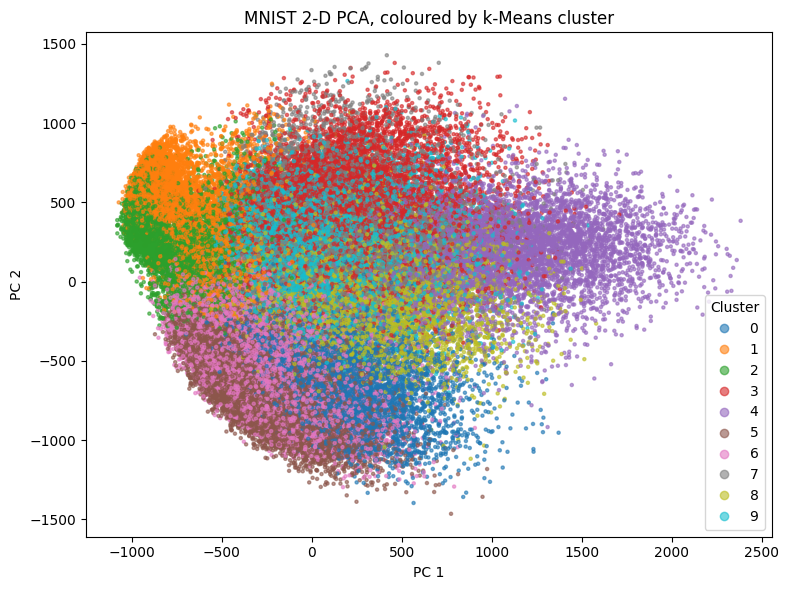

In [3]:
# Run k-Means with k=10
k = 10
km = KMeans(n_clusters=k, random_state=42)
clusters = km.fit_predict(X)
inertia = km.inertia_
print(f'k-Means inertia (k={k}): {inertia:.2e}')

# 2-D PCA projection colored by k-Means cluster
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=clusters, cmap='tab10', s=5, alpha=0.6
)
plt.title('MNIST 2-D PCA, coloured by k-Means cluster')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(*scatter.legend_elements(), title='Cluster', loc='best')
plt.tight_layout()
plt.show()

## PCA

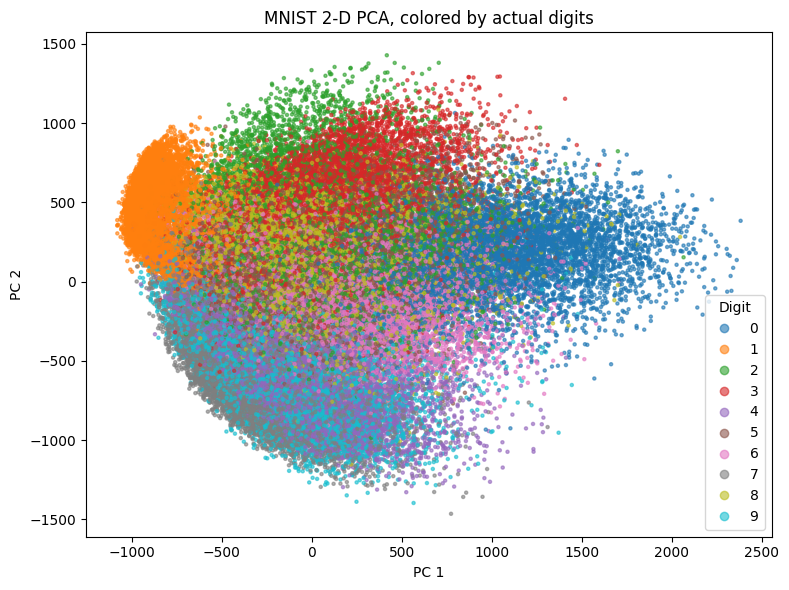

In [4]:
# 2-D PCA projection of the original MNIST data
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=y, cmap='tab10', s=5, alpha=0.6
)
plt.title('MNIST 2-D PCA, colored by actual digits')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(*scatter.legend_elements(), title='Digit', loc='best')
plt.tight_layout()
plt.show()

## tSNE

tSNE on a reduced data (to save time)

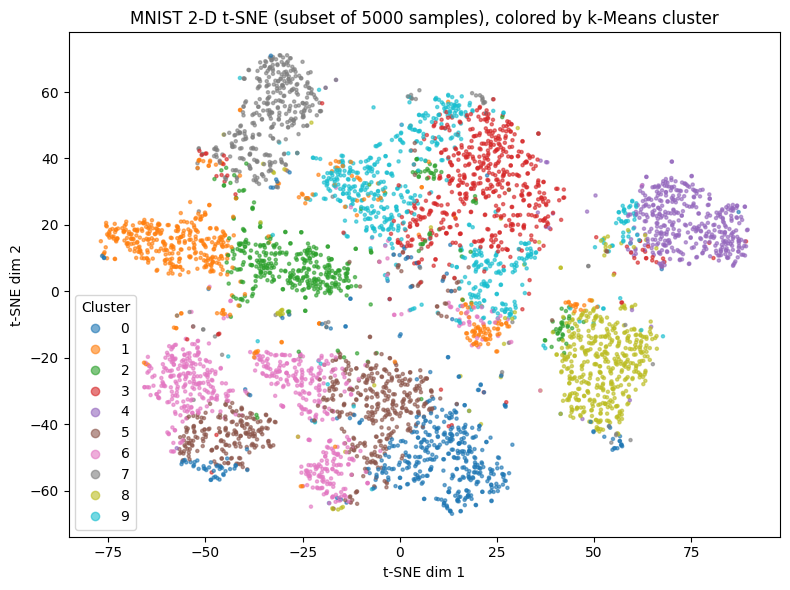

In [5]:
# Use a smaller subset of the data for t-SNE to speed up computation
n_samples = 5000  # You can adjust this number
X_subset = X[:n_samples]
clusters_subset = clusters[:n_samples]

tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=12,
            learning_rate=200, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_tsne[:,0], X_tsne[:,1],
    c=clusters_subset, cmap='tab10', s=5, alpha=0.6
)
plt.title(f'MNIST 2-D t-SNE (subset of {n_samples} samples), colored by k-Means cluster')
plt.xlabel('t-SNE dim 1')
plt.ylabel('t-SNE dim 2')
plt.legend(*scatter.legend_elements(), title='Cluster', loc='best')
plt.tight_layout()
plt.show()

## Reflection

- How did the curse of dimensionality manifest in the k-Means + PCA plot?
- In what ways did t-SNE help reveal cluster structure that PCA + k-Means struggled to show?


## tSNE code

tSNE code on full data (takes a long time)

In [ ]:
# 4. t-SNE embedding (perplexity=30)
tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=12,
            learning_rate=200, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_tsne[:,0], X_tsne[:,1],
    c=clusters, cmap='tab10', s=5, alpha=0.6
)
plt.title('MNIST 2-D t-SNE, colored by k-Means cluster')
plt.xlabel('t-SNE dim 1')
plt.ylabel('t-SNE dim 2')
plt.legend(*scatter.legend_elements(), title='Cluster', loc='best')
plt.tight_layout()
plt.show()

## References

[1] https://en.wikipedia.org/wiki/Curse_of_dimensionality
